# Expample 1. Validation methods
---
The data is using [breast cancer of Wisconsin](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data)

### Import packges and data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition   import PCA
from sklearn.linear_model    import LogisticRegression

In [2]:
df = pd.read_csv('wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y) 
np.unique(y)
# 1: M (have cancer), 0: B (without cancer)

array([0, 1])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 1. Pipeline

Simpilify the procedure of learning, it combines all the method into a *pipe*.

In [5]:
from sklearn.pipeline import Pipeline

In [6]:
pipe_lr = Pipeline([('scl', StandardScaler()), 
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print 'Train accuracy: %3f'% pipe_lr.score(X_train, y_train)
print 'Test accuracy: %3f'% pipe_lr.score(X_test, y_test)

Train accuracy: 0.953846
Test accuracy: 0.947368


### 2. k-fold cross-validation

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score  

In [8]:
# Standard way using K-fold cross-validation
kfold = StratifiedKFold( n_splits=10, random_state=1 )
scores = []
for k, (train, test) in enumerate(kfold.split(X_train, y_train)):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print 'Fold: %s, Class dist.: %s, Acc: %.3f'%(k+1, np.bincount(y_train[train]), score)
print 'CV accuracy: %.3f +/- %.3f'%( np.mean(scores), np.std(scores))

Fold: 1, Class dist.: [256 153], Acc: 0.891
Fold: 2, Class dist.: [256 153], Acc: 0.978
Fold: 3, Class dist.: [256 153], Acc: 0.978
Fold: 4, Class dist.: [256 153], Acc: 0.913
Fold: 5, Class dist.: [256 153], Acc: 0.935
Fold: 6, Class dist.: [257 153], Acc: 0.978
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.956
Fold: 9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.956
CV accuracy: 0.950 +/- 0.029


In [9]:
# An alternative efficient way
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print 'CV accuracy scores: %s '% scores
print 'CV accuracy: %.3f +/- %.3f'%( np.mean(scores), np.std(scores))

CV accuracy scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556] 
CV accuracy: 0.950 +/- 0.029


### 3. Learning curve with k-fold cross-validation

The learning curve is used to check the underfitting or overfitting if due to the variaciance or bias. The way to study the problem is by checking the fit results from different number of samples. Here we use the packge ***learning_curve*** from ***sklearn.model_selection*** to achive the method. The fitting scores for each different ratio of training samples are obtained by k-fold cross-validation method to have reasonable values. The results of traning and test data are also visualized with thiers standard diviations for checking if they are overfitting. 

In [10]:
from sklearn.model_selection import learning_curve

In [11]:
pipe_lr = Pipeline([('scl', StandardScaler()), 
                    ('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=15,
                                                       n_jobs=1)
np.shape(train_scores)

(10, 15)

In [12]:
train_sizes

array([ 42,  84, 127, 169, 212, 254, 296, 339, 381, 424])

In [13]:
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mean,  test_std  = np.mean(test_scores, axis=1),  np.std(test_scores, axis=1)
np.shape(train_mean)

(10,)

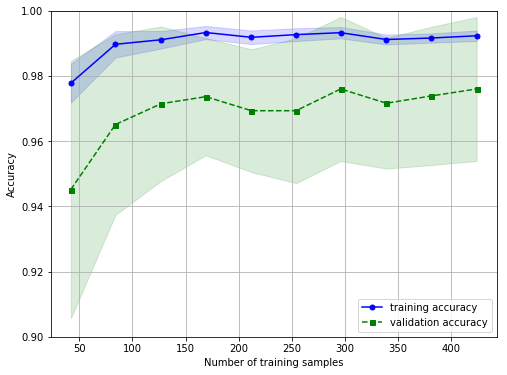

In [19]:
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes,  test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9, 1.0])
plt.show()